# Project: Investigate the No-Show Appointments dataset (source Kaggle)
Author: Paula Jasper

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#initial_findings">Initial findings</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#RQ1">Research Question 1: Characteristics of people who show up vs those who don't</a></li>
<li><a href="#Q1_observations">Question 1 Observations</a></li>
<li><a href="#RQ2">Research Question 2: Gender Analysis</a></li>
<li><a href="#Q2_observations">Question 2 Observations</a></li>
<li><a href="#RQ3">Research Question 3: Age Analysis</a></li>
<li><a href="#Q3_observations">Question 3 Observations</a></li>
<li><a href="#RQ4">Research Question 4: Booking/Appointment Time Delta differences</a></li>
<li><a href="#Q4_observations">Question 4 Observations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction


> In this project I will be analysing the 'No Show Appointments" dataset from Kaggle.com.  This dataset contains information from approximately 100,000 medical appointments in Brazil and is focused on whether or not patients show up for their appointments. A number of characteristics about the patients are included in each row, including medical conditions, gender, age and place on welfare programme.

>There are many questions which could be analysed using this data.  The questions I will investigate are listed below: 
>
>   ●  What are the characteristics of people who show up to their appointments versus those who don't, and do factors such as scholarship and medical conditions influence whether people show up?
>
>   ●  Are there any gender differences shown in the data, in terms of liklihood of showing for appointments and liklihood of having medical conditions or social inequality?
>
>   ●  Which age groups book the most appointments, and which are less likely to show?
>
>   ●  How far in advance do people book their appointments and does does the length of time make a difference to whether the patient turns up or not?



> 
> Here are some other issues that I could have investigated:
>
>  ● Is there a correlation between where a person lives and whether they are likely to show? And do people from certain neighbourhoods make more appointments?
>
>  ● Does it make a difference if an sms message is sent as a reminder?
>
>  ● Does the day of the week have a bearing on whether a patient shows for their appointment? And which days are more popular for booking appointments?


In [1]:
# Import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In the next few cells I will load the data, then run the head(), shape(), info() and describe() functions in order to gain an initial understanding of the data, including the size of the data set, the datatypes, and if there is any missing or erroneous data. I will also check the values of certain fields. 
>
>I will document my findings and describe the cleansing processes I will undertake below this.


In [2]:
# Load the data  
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
# Print a few lines.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Find out number of rows and columns
df.shape

(110527, 14)

In [5]:
# Get a quick understanding of the data in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#This data sample is less than 0.3% of the Brazilian population, which will impact the accuracy of the findings
# Number of unique patient ids in the sample
num_patients = pd.to_numeric(df.PatientId.nunique())
print(num_patients)
brazil_pop = 213107912
sample_percentage = (num_patients / brazil_pop) * 100
print(sample_percentage)

62299
0.029233546242055996


 <a id='initial_findings'></a>
## Initial findings


> I can see that the dataset has 110,527 rows and 14 columns.  There do not appear to be any missing values.
>
> I will rename 'AppointmentID' and 'SMS_received' columns to make them consistent
>
> I will rename 'Handcap' to 'Handicap' as I assume this is what it is supposed to be.
>
> I will rename 'Hipertension' to 'Hypertension'
>
> I will rename 'No-show' to 'Attended' as the column name is confusing. 
> I will make the 'Attended' column an integer in order to allow stats to be performed later.
> No (meaning the patient attended the appointment) will become 1
> Yes (meaning the patient did not attend) will become 0
>
> The PatientId and AppointmentID columns are being displayed in scientific notation which is not helpful.  One is a float and the other an int.  I will convert them both to strings as mathematical calculations are not neccessary for ids.  I may drop them later anyway.
>
> The ScheduledDay and AppointmentDay datatypes are both strings.  They should be datetime types.  I will change this.
>
> I will create a timedelta variable to calculate the difference between the ScheduledDay and AppointmentDay. 
>
> The youngest person appears to be -1 (which is not possible), the oldest 115 (which is unlikely, but not impossible), and the majority of people are between 18 and 55, with the mean age being 37.  I will investigate the -1 and 115 rows.
>
> The scholarship data looks OK.  The only values are 0 and 1 and the mean is 0.09 so the majority of people are not enrolled in the welfare programme. 
> The Hypertension data looks OK.  The only values are 0 and 1 and the mean is 0.19 so the majority of people are not diagnosed with hypertension.
> The Diabetes data looks OK.  The only values are 0 and 1 and the mean is 0.07 so the majority of people are not diagnosed with diabetes.
> The Alcoholism data looks OK.  The only values are 0 and 1 and the mean is 0.03 so the majority of people are not diagnosed with alcoholism.
> The Handicap data looks OK.  The only values are 0,2,3 and 4 and the mean is 0.02 so the majority of people are not diagnosed with a handicap.
> The SMSReceived data looks OK.  The only values are 0 and 1 and the mean is 0.32 so the majority of people do not receive a reminder SMS.
> The Gender data looks OK.  The only values are M and F.
> 
> There are no duplicate entries.

<a id='data_cleansing'></a>
## Data Cleansing 
>I will make the changes that I identified above.

In [8]:
#Rename the columns
df.rename(columns={'AppointmentID':'AppointmentId','SMS_received':'SMSReceived','No-show':'Attended',
                    'Handcap':'Handicap','Hipertension':'Hypertension'},inplace=True)

In [9]:
# Change 'Attended' datatype from string to int in order to analyse later.
df = df.replace(['No', 'Yes'], [1, 0])

In [10]:
#Convert the PatientId and AppointmentId datatypes to strings to surpress scientific notation.
df.PatientId = df.PatientId.map(lambda x: '{:.0f}'.format(x))
df.AppointmentId = df.AppointmentId.map(lambda x: '{:.0f}'.format(x))

In [11]:
#Convert the ScheduledDay and AppointmentDay to datetime datatypes
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [12]:
#Add a column for number of days between ScheduledDay and AppointmentDay
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDay'].dt.date)
df['Diff'] =  df['AppointmentDay'].subtract(df['ScheduledDate']).dt.days

df.head()


,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attended,ScheduledDate,Diff
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,0
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,0
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,0
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
PatientId         110527 non-null object
AppointmentId     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMSReceived       110527 non-null int64
Attended          110527 non-null int64
ScheduledDate     110527 non-null datetime64[ns]
Diff              110527 non-null int64
dtypes: datetime64[ns](3), int64(9), object(4)
memory usage: 13.5+ MB


In [14]:
#The youngest person is -1.  I will examine this data
df.query('Age < 0')

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attended,ScheduledDate,Diff
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1,2016-06-06,0


In [15]:
#Possible options are I could drop this row, convert the age to the mean age, or I could convert it to 0.  
#I have decided to drop this row as I have no way of working out what the correct age should have been.
df.drop(df[(df.Age < 0)].index, inplace = True)

In [16]:
# Verify this row has been deleted.  
df.query('Age < 0')

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attended,ScheduledDate,Diff


In [17]:
#The oldest person is 115. I will examine data for people over 100
df.query('Age > 100')

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attended,ScheduledDate,Diff
58014,976294799775439,5651757,F,2016-05-03 09:14:53,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,1,2016-05-03,0
63912,31963211613981,5700278,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,0,2016-05-16,3
63915,31963211613981,5700279,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,0,2016-05-16,3
68127,31963211613981,5562812,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,0,2016-04-08,38
76284,31963211613981,5744037,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,1,2016-05-30,0
90372,234283596548,5751563,F,2016-05-31 10:19:49,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,1,2016-05-31,2
97666,748234579244724,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,1,2016-05-19,15


In [18]:
#There are actually 2 people who are 102 (1 appointment each) and 2 people who are 115 (with 5 appointments between them)  
#102 is definitely possible so I will leave this data in.
#115 is also possible. According to the media, the oldest man in the world is in Brazil and has just turned 126 (see ref at end).
#Therefore, I will keep this data in.

#I have noticed that there appears to be duplicate appointment data.
#Rows 63912 and 63915 look like they are duplicate appointments, but with different AppointmentIDs so they weren't
#picked up by the duplicated() function. 
#I will investigate

In [19]:
#Look for duplicate appointments
cols_for_dups=['PatientId','ScheduledDay','AppointmentDay','Attended']
df[df.duplicated(cols_for_dups, keep=False)].sort_values(by=['PatientId','ScheduledDay'])
#Some of these look odd. There are duplicate appointments but in one row an SMS was sent, and the other an SMS wasn't sent.
#Therefore I would question the accuracy of the SMS data.  In all cases, the Attended value is the same for the duplicate rows.


,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attended,ScheduledDate,Diff
101631,1115255573477,5721667,M,2016-05-19 17:24:01,2016-06-01,60,CENTRO,0,0,0,0,0,0,1,2016-05-19,13
101635,1115255573477,5721666,M,2016-05-19 17:24:01,2016-06-01,60,CENTRO,0,0,0,0,0,1,1,2016-05-19,13
19089,11238367556569,5675794,F,2016-05-09 14:21:41,2016-05-13,28,ROMÃO,0,1,0,0,0,0,1,2016-05-09,4
19091,11238367556569,5675795,F,2016-05-09 14:21:41,2016-05-13,28,ROMÃO,0,1,0,0,0,0,1,2016-05-09,4
72618,113952483828156,5659908,F,2016-05-04 15:03:27,2016-05-31,41,DO MOSCOSO,1,0,0,0,0,1,1,2016-05-04,27
72619,113952483828156,5659909,F,2016-05-04 15:03:27,2016-05-31,41,DO MOSCOSO,1,0,0,0,0,0,1,2016-05-04,27
1556,1144471549922,5590629,F,2016-04-15 14:35:51,2016-04-29,21,BENTO FERREIRA,0,0,0,0,0,0,0,2016-04-15,14
1557,1144471549922,5590628,F,2016-04-15 14:35:51,2016-04-29,21,BENTO FERREIRA,0,0,0,0,0,0,0,2016-04-15,14
1558,1144471549922,5590627,F,2016-04-15 14:35:51,2016-04-29,21,BENTO FERREIRA,0,0,0,0,0,0,0,2016-04-15,14
35713,1144471549922,5642567,F,2016-04-29 16:22:28,2016-05-06,21,BENTO FERREIRA,0,0,0,0,0,0,0,2016-04-29,7


In [20]:
#Drop the duplicate appointments, but keep the first occurance
df.drop_duplicates(subset=cols_for_dups, keep="first", inplace=True)
#I can now drop AppointmentId
df.drop('AppointmentId', axis=1)


,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attended,ScheduledDate,Diff
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,0
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,0
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,0
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,0
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,0
5,95985133231274,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1,2016-04-27,2
6,733688164476661,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0,2016-04-27,2
7,3449833394123,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0,2016-04-27,2
8,56394729949972,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,1,2016-04-29,0
9,78124564369297,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,1,2016-04-27,2


In [21]:
#1306 duplicate rows have been deleted.  There are now 109221 rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109221 entries, 0 to 110526
Data columns (total 16 columns):
PatientId         109221 non-null object
AppointmentId     109221 non-null object
Gender            109221 non-null object
ScheduledDay      109221 non-null datetime64[ns]
AppointmentDay    109221 non-null datetime64[ns]
Age               109221 non-null int64
Neighbourhood     109221 non-null object
Scholarship       109221 non-null int64
Hypertension      109221 non-null int64
Diabetes          109221 non-null int64
Alcoholism        109221 non-null int64
Handicap          109221 non-null int64
SMSReceived       109221 non-null int64
Attended          109221 non-null int64
ScheduledDate     109221 non-null datetime64[ns]
Diff              109221 non-null int64
dtypes: datetime64[ns](3), int64(9), object(4)
memory usage: 14.2+ MB


In [22]:
#Verify that there are no duplicated appointments
df[df.duplicated(cols_for_dups, keep=False)].sort_values(by=['PatientId','ScheduledDay'])

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attended,ScheduledDate,Diff


In [23]:
#Double check one of the previously duplicated rows to verify only unique appointments remain
df[df.PatientId=='1144471549922']

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attended,ScheduledDate,Diff
1556,1144471549922,5590629,F,2016-04-15 14:35:51,2016-04-29,21,BENTO FERREIRA,0,0,0,0,0,0,0,2016-04-15,14
35713,1144471549922,5642567,F,2016-04-29 16:22:28,2016-05-06,21,BENTO FERREIRA,0,0,0,0,0,0,0,2016-04-29,7


In [24]:
# See if there is any erroneous data in the Gender and Attended columns and check for duplicates
print(df['Gender'].unique())
print(df['Attended'].unique())
print(df['Handicap'].unique())
print(sum(df.duplicated()))

['F' 'M']
[1 0]
[0 1 2 3 4]
0


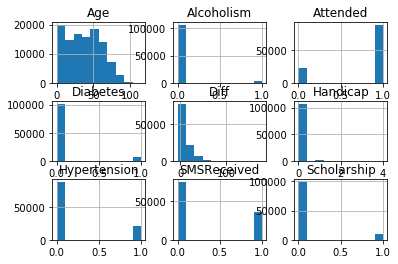

In [25]:
#This visually confirms that the information from the describe function earlier.  There is no erroneous data in the 
# numerical columns.  The only values are 0 and 1 (or 0-4 for handicap).
#We can also quickly see that many more people attended than didn't, that a minority of people have medical conditions,
#fewer people received sms messages than didn't and that the age distribution is right skewed, with more younger people
#than older people.
df.hist();


In [26]:
print(df.Neighbourhood.nunique())
print(df.Neighbourhood.unique())

81
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO' 'DO MOSCOSO'
 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA' 'ILHA DO FRADE'
 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO' 'BOA VISTA'
 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA' 'BARRO VERMELHO'
 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE' 'ENSEADA DO SUÁ'
 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH' 'SANTA TEREZA' 'CRUZAMENTO'
 'ILHA DO PRÍNCIPE' 'ROMÃO' 'COMDUS

<a id='eda'></a>
## Exploratory Data Analysis

<a id='RQ1'></a>
### Research Question 1: What are the characteristics of people who show up to their appointments versus those who don't, and could factors such as scholarship and medical conditions influence whether people show up?

In [27]:
# Get values for show and no show appointments.  This is my dependent variable.
print(df['Attended'].value_counts())
print(df['Attended'].mean())
#Almost 80% of people showed up for appointments.

1    87343
0    21878
Name: Attended, dtype: int64
0.799690535702841


In [28]:
#Look in more detail at the characteristics of appointments that were kept...
attended = df.query('Attended == 1')
not_attended = df.query('Attended == 0')
attended.describe()    

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attended,Diff
count,87343.000000,87343.000000,87343.000000,87343.000000,87343.000000,87343.000000,87343.000000,87343.0,87343.000000
mean,37.801255,0.093848,0.204493,0.073709,0.030546,0.022681,0.292410,1.0,8.658645
std,23.367299,0.291619,0.403333,0.261299,0.172086,0.162137,0.454872,0.0,14.500221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,12.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.0,179.000000


In [29]:
#...and those that weren't kept.
not_attended.describe()   

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attended,Diff
count,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.0,21878.000000
mean,34.288966,0.115733,0.168891,0.064494,0.030304,0.020249,0.444328,0.0,15.697367
std,21.987808,0.319911,0.374664,0.245637,0.171428,0.156823,0.496902,0.0,16.570691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-6.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,10.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,23.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.0,179.000000


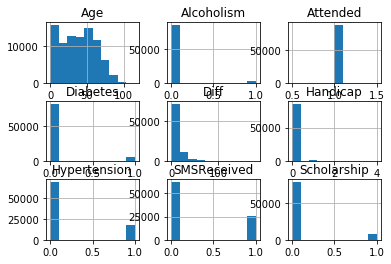

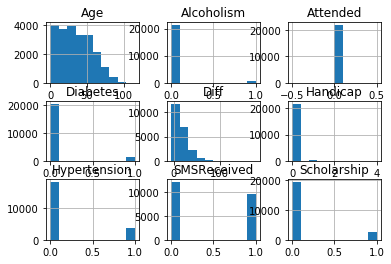

In [30]:
attended.hist();
plt.show()
not_attended.hist();
#The following provides a graphical representation of the above tables.

In [31]:
#Look at gender
df.groupby('Gender')['Attended'].mean()


Gender
F    0.798281
M    0.802307
Name: Attended, dtype: float64

In [32]:
print(attended['Diff'].mean())
print(not_attended['Diff'].mean())

8.658644653836026
15.697367218210074


 <a id='Q1_observations'></a>
## Question 1 Observations

> Initial findings are that there aren't big differences between the characteristics of people that showed for appointments and those that did not.


> People who attended are slightly older (mean ages of 37 (those who showed) and 34 (those who didn't). 
>
> No show appointments had a slightly higher proportion of patients on the welfare programme.
>
> No show appointments had a lower proportion of patients with hipertension, diabetes, and handicap.
>
> No show appointments had a very slightly lower proportion of patients with alcoholism.
>
> No show appointments had a higher proportion of people who received an sms - this is surprising but there may be an explanation that we can't test in the data - maybe the subset of people who receive text messages are those already found not to show for appointments.
>
> It looks like men were slightly more likely than women to attend appointments.
>
> There is more of a difference between the date of booking and the date of the appointment. Attended appointments had a mean difference of 8 days between booking and appointment day.  Non attended had a mean difference of 15 days.
>
>


 <a id='RQ2'></a>
### Research Question 2  Gender differences: a) Are women more likely to have medical and social factors associated with them, and b) could this affect whether they show for appointments?

In [33]:
#We have seen that men are very slightly more likely to turn up to an appointment than women (80% of men, 79.8% of women)
df.groupby('Gender')['Attended'].mean()

Gender
F    0.798281
M    0.802307
Name: Attended, dtype: float64

In [34]:
#There are a lot more women in the dataset.  Therefore I will analyse using proportions instead of counts
df.groupby('Gender')['Attended'].value_counts()

Gender  Attended
F       1           56670
        0           14320
M       1           30673
        0            7558
Name: Attended, dtype: int64

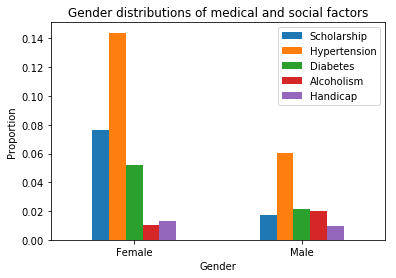

In [35]:
#Investigate the liklihood of other factors associated with Men and Women
tot = len(attended)
factors = attended.groupby('Gender')[["Scholarship", "Hypertension", "Diabetes", "Alcoholism", "Handicap", ]].sum()/tot
factors.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(range(2), ['Female', 'Male'], rotation = 0)
plt.title('Gender distributions of medical and social factors');
plt.show()
#We can clearly see that women are more likely to have other factors which could be the reason they are more likely not
#to show, rather than gender being the reason.


 <a id='Q2_observations'></a>
## Question 2 Observations

> a) This plot shows that women are more likely to have (diagnosed) medical and social factors affecting them.  The only exception is Alcoholism, which is more prevalent among men. Women are more likely to be have hypertension, diabetes, a handicap and to be on the scholarship programme.
>
>
> b) However, these findings do not indicate why women are less likely to show for appointments because  the findings of Question 1 are that people are more likely to show up for appointments if they have medical conditions.
>
> On the other hand, people on the Scholarship program are less likely to show for appointments  and there are more women in this category.  there are also more women in this sample.

 <a id='RQ3'></a>
### Research Question 3 Age differences: Which age group books the most appointments, and how likely are they to show for them?



In [36]:
df['Age'].describe()
# Age ranges from 0 to 115, with the majority between 18 and 55.


count    109221.000000
mean         37.097710
std          23.140213
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

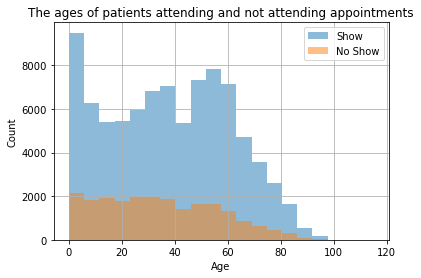

In [37]:
att = df.Attended == 1
no_att = df.Attended == 0

df.Age[att].hist(alpha=0.5, bins=20, label='Show')
df.Age[no_att].hist(alpha=0.5,bins = 20, label='No Show')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('The ages of patients attending and not attending appointments')
plt.legend();
plt.show()
# Most appointments are made for babies and those in middle age, and the indication most of these are kept.
# The general trend is that older people (above 60) are less likely to make or show for appointments.

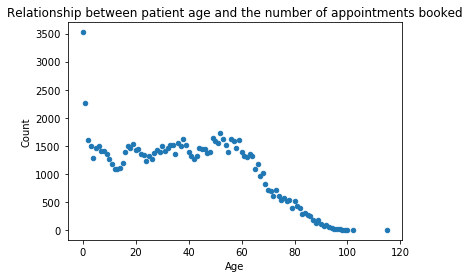

In [38]:
#Show these findings on scatter plots
age_appt_counts = df.groupby( ['Age'] ).size().to_frame(name = 'Count').reset_index()
title='Relationship between patient age and the number of appointments booked'                
age_appt_counts.plot(x='Age',y='Count', kind='scatter', title=title);
plt.show()
#negative correlation between age and number of appointments - i.e. Generally, as as age increases fewer appointments are made, especially over 60s.
#However, there are indications that older children make fewer appointments, as do people in their early 40s and mid 20s.

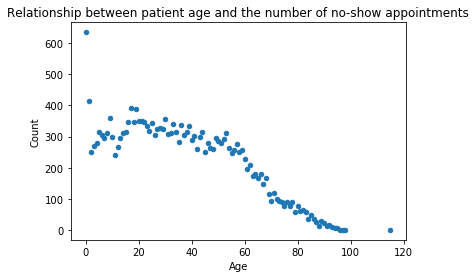

In [39]:
noatt_age_appt_count = not_attended.groupby( ['Age'] ).size().to_frame(name = 'Count').reset_index()
title='Relationship between patient age and the number of no-show appointments'        
noatt_age_appt_count.plot(x='Age',y='Count', kind='scatter', title=title);
plt.show()
#There is still a negative correlation but weaker than for appointments booked- as people get older they show for fewer appointments
#As shown in the bar chart, we can see appointments fall for older children and people in early 40s.


In [40]:
#merge 2 dataframes
noatt_age_appt_count.rename(columns = lambda x:x[:5]+"_no_show", inplace=True)
#Still a negative correlation but weaker no show appointments

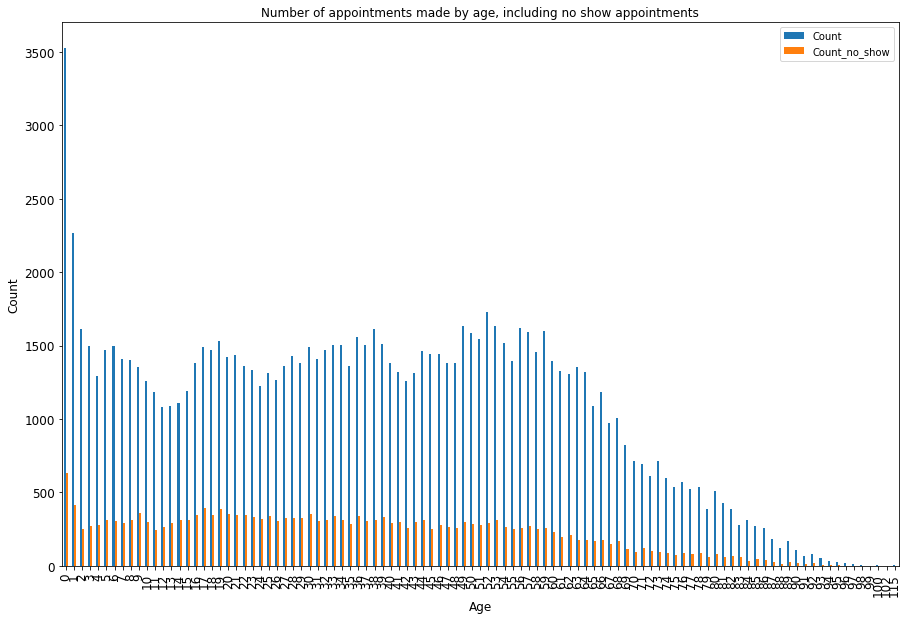

In [41]:
df_combined = age_appt_counts.merge(noatt_age_appt_count, left_on=('Age'),right_on=('Age_no_show'),how='outer')
df_combined.fillna(0, inplace=True)
df_combined['Count_no_show'] = df_combined['Count_no_show'].astype(int)
df_combined.drop('Age_no_show',axis=1, inplace=True)
df_combined.set_index('Age', inplace=True)
ax = df_combined[['Count','Count_no_show']].plot(kind='bar', title ="Number of appointments made by age, including no show appointments", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
#plt.xticks(range(len(df_combined), [], rotation = 0))
plt.show()
# Also display this on a bar chart to see the ages in more detail.  The dip in appointments is 11-13 year olds, 41-43 year olds
# and from 60.



 <a id='Q3_observations'></a>
## Question 3 Observations

> The plots show that most appointments are made for babies and those in middle age, however the indication is that many of these are not kept.
> 
> The general trend is that older people (above 60) are less likely to make appointments.
>
> There is generally a negative correlation between age and booked appointments. However, this is more marked after 60.

> There is also a negative correlation between no show appointments and age, but it is weaker than appointment bookings.
>
> Most appointments are made for babies. After older people, children between 12 and 14 make the least number of appointments

 <a id='RQ4_observations'></a>
## Research Question 4 Are people less likely to show for appointments when there is a long wait between booking the appointment and seeing the doctor?


In [42]:
#I will use the extra timedelta column that I created earlier
df['Diff'].describe()

count    109221.000000
mean         10.068567
std          15.201199
min          -6.000000
25%           0.000000
50%           4.000000
75%          14.000000
max         179.000000
Name: Diff, dtype: float64

In [43]:
#It looks like the majority of people book appointments on the same day or up 2 weeks before the appointment.
# However, there are some outliers that may be odd the -6 day difference and the 179 day difference.
#I will investigate these.
df[df['Diff'] < 0]


,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attended,ScheduledDate,Diff
27033,7839272661752,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,0,2016-05-10,-1
55226,7896293967868,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,2016-05-18,-1
64175,24252258389979,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,0,2016-05-05,-1
71533,998231581612122,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,2016-05-11,-6
72362,3787481966821,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,0,2016-05-04,-1


In [44]:
# This shows that someone booked their appointment 6 days after they had that appointment, and 4 people booked 1 day after
# This data does not make sense so I will drop these rows.  
df.drop(df[df['Diff'] < 0].index, inplace = True)

In [45]:
# This shows that there are 10 patients who had appointments 6 months after they were booked.  
# These were all booked on the same day. Also, all but one of the patients had Hypertension and Diabetes, 
# and the majority showed for the appointment. I will leave this data in as it is plausable.  
# It could be that this was a particular clinical day for people with certain medical conditions.

df[df['Diff'] == 179]

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attended,ScheduledDate,Diff
102786,454287126844,5134227,M,2015-12-07 10:43:34,2016-06-03,67,MARUÍPE,0,1,1,0,0,0,1,2015-12-07,179
102788,254755473188837,5134249,F,2015-12-07 10:45:01,2016-06-03,63,SÃO CRISTÓVÃO,0,1,1,0,0,1,1,2015-12-07,179
102789,31123415579473,5134239,F,2015-12-07 10:44:25,2016-06-03,60,SÃO CRISTÓVÃO,0,1,1,0,0,1,1,2015-12-07,179
102790,996534792394327,5134243,M,2015-12-07 10:44:40,2016-06-03,73,MARUÍPE,0,1,1,0,0,0,1,2015-12-07,179
102791,941625887116382,5134228,F,2015-12-07 10:43:50,2016-06-03,77,SÃO CRISTÓVÃO,0,1,1,0,0,1,1,2015-12-07,179
102792,351265918724495,5134233,M,2015-12-07 10:44:07,2016-06-03,73,MARUÍPE,0,1,1,0,1,0,0,2015-12-07,179
102795,1216586867796,5134197,F,2015-12-07 10:40:59,2016-06-03,27,SÃO CRISTÓVÃO,1,0,0,0,0,1,0,2015-12-07,179
102796,9582232334148,5134223,F,2015-12-07 10:43:01,2016-06-03,80,SÃO CRISTÓVÃO,0,1,1,0,0,1,1,2015-12-07,179
102797,31899595421534,5134220,F,2015-12-07 10:42:42,2016-06-03,48,MARUÍPE,0,1,1,0,0,1,1,2015-12-07,179
102799,3516253533716,5134224,F,2015-12-07 10:43:17,2016-06-03,74,SÃO CRISTÓVÃO,0,1,1,0,0,1,1,2015-12-07,179


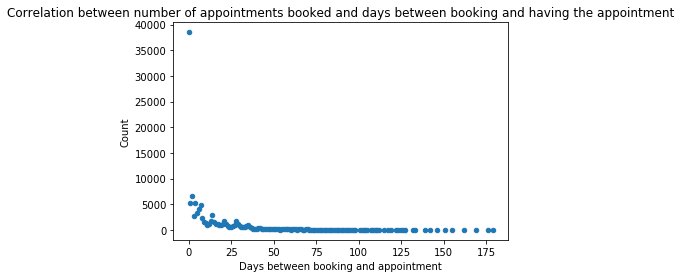

In [46]:
#Plot the frequency of time interval counts 
diffs = df.groupby('Diff')['Attended'].count()
diffs = diffs.to_frame(name = 'Count').reset_index()
title="Correlation between number of appointments booked and days between booking and having the appointment"
ax = diffs.plot(x='Diff',y='Count', kind='scatter', title=title);
ax.set_xlabel('Days between booking and appointment');
#clearly most booked on same day.
#I will drop where days is 0 in order to view the rest more closely

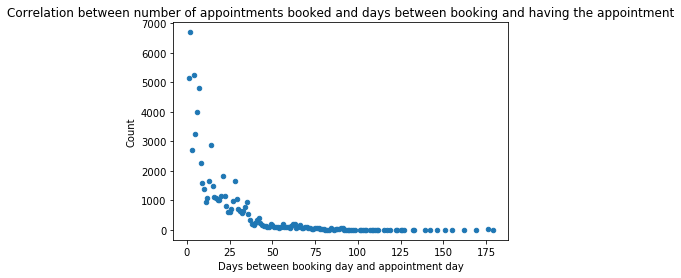

In [47]:
#This makes it clearer
diffs.drop(diffs[diffs['Diff']== 0].index, inplace = True)
ax = diffs.plot(x='Diff',y='Count', kind='scatter', title=title)
ax.set_xlabel('Days between booking day and appointment day');
#There is a negative correlation between the number of days between booking and having the appointment.
#The negative correlation is much stronger for younger and younger middle aged people

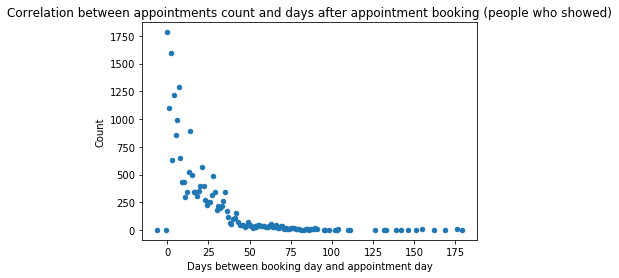

In [48]:

#not_attended.drop(not_attended[not_attended['Diff_int'] < 0].index, inplace = True)
non_att_diffs = not_attended.groupby('Diff')['Attended'].count()
non_att_diffs = non_att_diffs.to_frame(name = 'Count').reset_index()
ax = non_att_diffs.plot(x='Diff',y='Count', kind='scatter');
ax.set_xlabel('Days between booking day and appointment day')
ax.set_title('Correlation between appointments count and days after appointment booking (people who showed)');


<a id='conclusions'></a>
## Conclusions


>GENERAL POINTS
>
>The main findings of my analysis are:
>
>People who have a diagnosed medical condition such as hipertension, diabetes, a handicap or alcoholism are more likely to show at medical appointments, whereas people on welfare are less likely to show.
>
>Men are slightly more likely than women to show at appointments, as are people who book appointments for the near future.
>
>People who are sent an sms message are less likely to attend.  
>
>These findings were deduced using summary tables and plotting histograms.



>GENDER
>
> Women are more likely to have (diagnosed) medical conditions, and are more likely to be poorer (on the welfare programme).  However, the exception is alcoholism, which is more prevalent among men. 
>
> There was no clear explanation for why women are less likely to show for appointments as people with medical conditions are generally more likely to attend appointments. 
>
> On the other hand, people on the Scholarship program are less likely to show for appointments  and there are more women in this category.
>
>These findings were deduced by plotting a bar graph.


>AGE
>
> The age of people in this sample ranges from 0 to 115, and the majority are between 18 and 55.
>
> Most appointments are made for babies and those in middle age, where as people over 60 do not make as may appointments. After older people, children between 12 and 14 make the least number of appointments, and there is another drop for people in their early 20s and mid 40s.
>
> There is generally a negative correlation between age and booked appointments, as less appointments are booked as people get older. However, this negative correlation is more marked after 60. There is also a negative correlation between no show appointments and age, but it is not as strong as for appointment bookings.
>
>These findings were deduced by plotting histograms, scatter plots and bar charts.


>PERIOD OF TIME BETWEEN APPOINTMENT BOOKING AND APPOINTMENT DAY
>
> The majority of people book appointments for the same day or up to 2 weeks after.
>
> There is a negative correlation between the number of days between booking and having the appointment, meaning that less people book a long time in advance. The negative correlation is much stronger for younger and younger middle aged people.
>
>These findings were deduced by plotting scatter plots.



>LIMITATIONS: Factors which could limit the validity of the conclusions.
>
>Data sample size:  This sample contains just over 110,000 records, which consists of just over 62,000 patients . As the population of Brazil is over 210 million this makes this sample less than 0.3% of the population.  
>Also, 65% of this sample are women, which doesn't reflect the current population of 49.2% (men) to 50.8% (women).
>Also, there are only 81 neighbourhoods are are contained in this sample.  This would be a limitation if I had analysed this data.
>
>Data accuracy: I identified a number of data issues during my data wrangling phase.
>One patient was recorded with an age of -1, which is impossible.  This record was removed from my analysis. 
>2 were 115, which is possible but unlikely.
>There were 1306 records with duplicate appointment information, based on PatientId, ScheduledDay, AppointmentDay and Attended columns.  Although these were recorded with distinct AppointmentIds.  These duplicates were removed for my analysis.
>
>The way in which I deduplicated appointment data was crude.  I retained the first row from the duplicate rows.  This could have skewed the results if the medical conditions and sms data was different in each duplicate appointment row.
> 
> More analysis could have been done given more time - i.e. categorising the ages, and anserwing the other questions posed in the introduction.

<a id='References'></a>
## References
Data set on Kaggle
https://www.kaggle.com/joniarroba/noshowappointments

drop rows: 
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

deal with scientific notation in id field:
https://stackoverflow.com/questions/41157981/pandas-convert-float-in-scientific-notation-to-string?noredirect=1

Oldest person in the world
https://www.telegraph.co.uk/news/worldnews/southamerica/brazil/10968734/Brazilian-who-turned-126-years-old-last-week-could-be-oldest-living-person.html

Viewing duplicates on a subset of columns
https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python

Querying timedelta datatype (for my 'Diff' column)
https://stackoverflow.com/questions/48376278/querying-timedelta-column-in-pandas-and-filtering-rows

For use in age/count of appts analysis
https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-object-to-dataframe

pairplots
https://www.kaggle.com/benhamner/python-seaborn-pairplot-example/code

Brazil demographics
https://knoema.com/atlas/Brazil/topics/Demographics/Population/Male-to-female-ratio; 
http://countrymeters.info/en/Brazil/
